# Starter Kaggle Code

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For reproducibility
from teachopencadd.utils import seed_everything
SEED = 42
seed_everything(SEED)

### The train_df is the dataset we must use to train and test the model, submissions are predictions on the test_df

In [2]:
# Load the data
train_file_path = "../Data/Data/Original Data/train.csv"
test_file_path = "../Data/Data/Original Data/test.csv"
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

df_num = train_df.select_dtypes(include = ['float64', 'int64'])

print("Full train dataset shape is {}".format(train_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)


In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Missing SalePrice Column
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/r0/qp6_p2111v1dzb0fg2bbfqsr0000gn/T/ipykernel_23940/1859412649.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


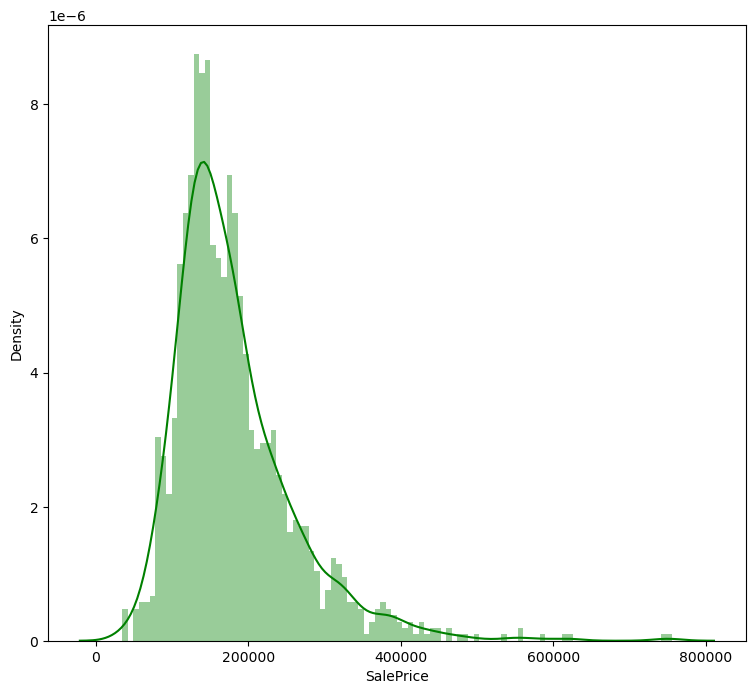

In [6]:
print(train_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [7]:
# Create a dataset only including numerical featues
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


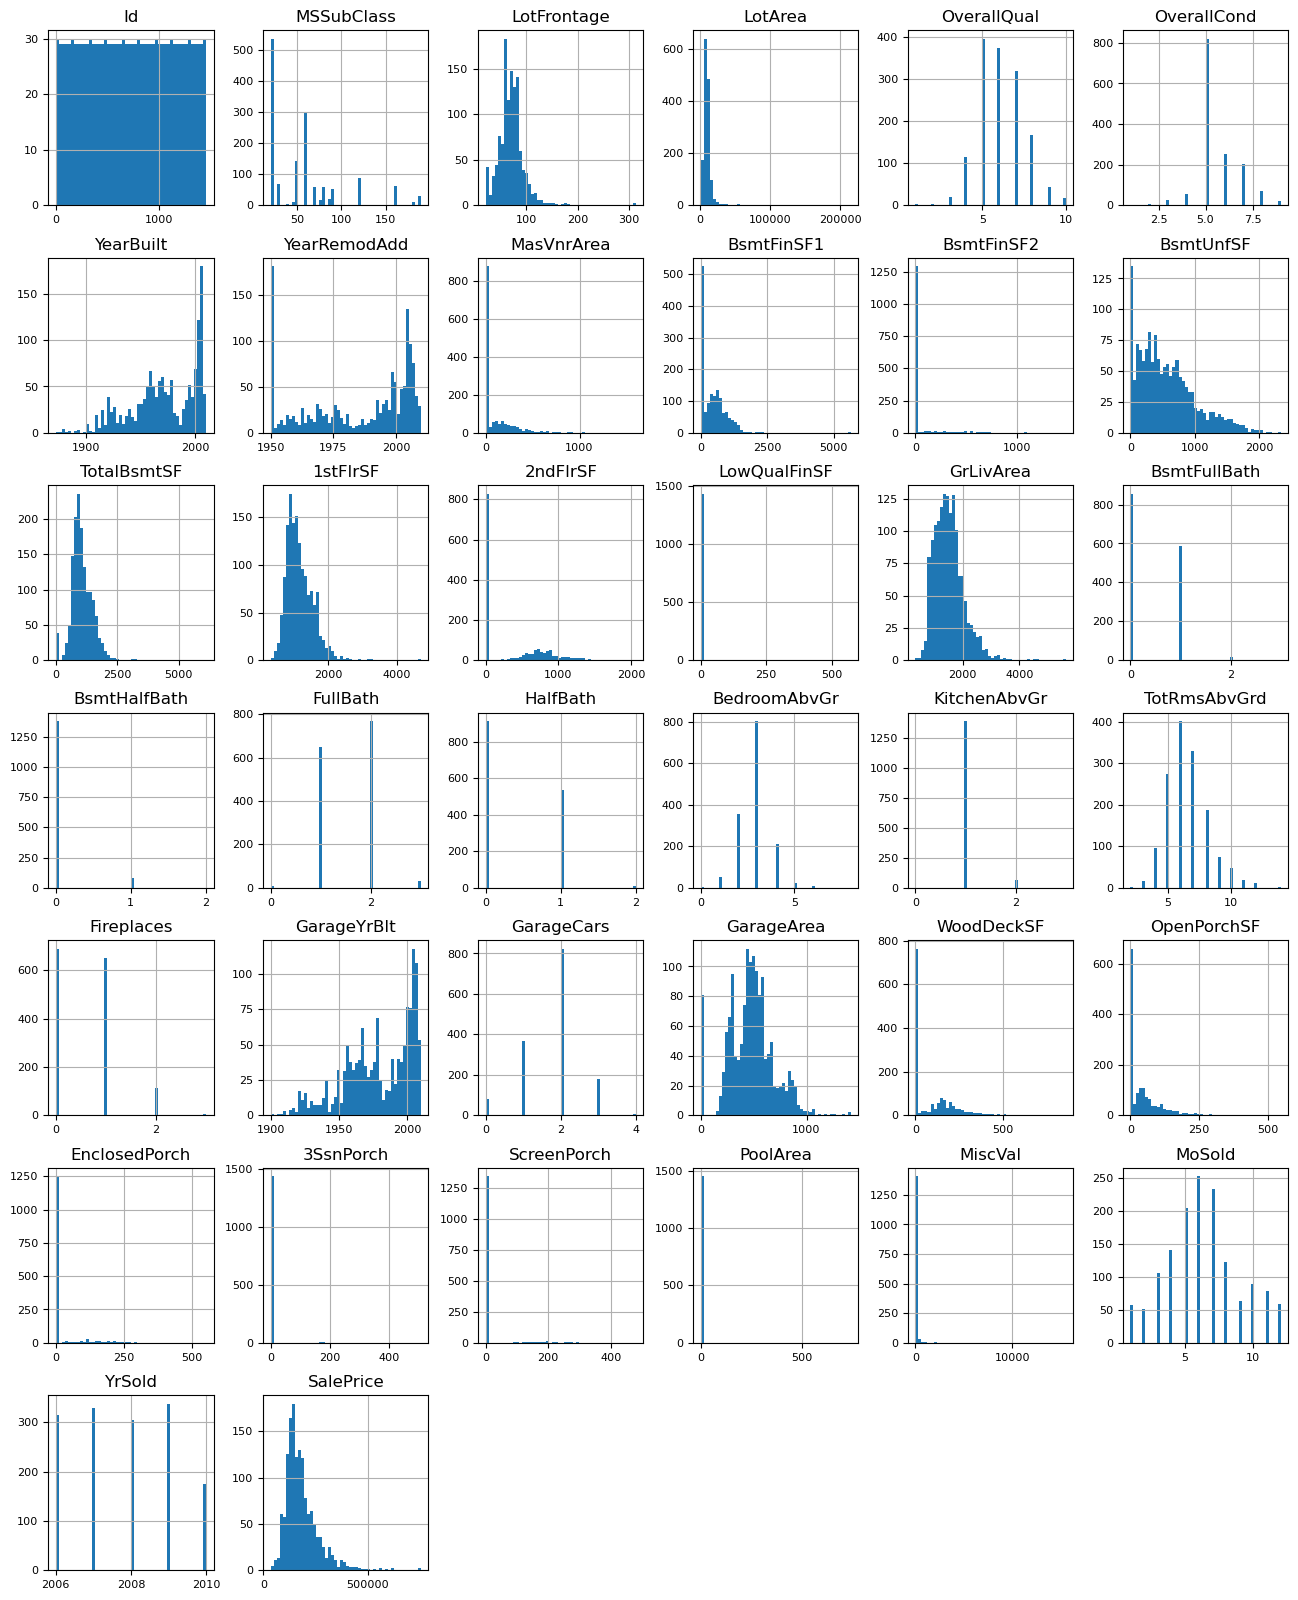

In [8]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Explore NAs in data / non helpful columns

In [9]:
#Displays the top 20 columns with most mising values
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


# Explore each feature with missing data

In [10]:
train_df["PoolQC"].fillna("NA", inplace=True)
test_df["PoolQC"].fillna("NA", inplace=True)

train_df["MiscFeature"].fillna("NA", inplace=True)
test_df["MiscFeature"].fillna("NA", inplace=True)

train_df["Alley"].fillna("NA", inplace=True)
test_df["Alley"].fillna("NA", inplace=True)

train_df["Fence"].fillna("NA", inplace=True)
test_df["Fence"].fillna("NA", inplace=True)

train_df["MasVnrType"].fillna("None", inplace=True)
test_df["MasVnrType"].fillna("None", inplace=True)

train_df["FireplaceQu"].fillna("NA", inplace=True)
test_df["FireplaceQu"].fillna("NA", inplace=True)

train_df["LotFrontage"].fillna(0, inplace=True)
test_df["LotFrontage"].fillna(0, inplace=True)

train_df["GarageYrBlt"].fillna(0, inplace=True)
test_df["GarageYrBlt"].fillna(0, inplace=True)

train_df["GarageCond"].fillna("NA", inplace=True)
test_df["GarageCond"].fillna("NA", inplace=True)

train_df["GarageType"].fillna("NA", inplace=True)
test_df["GarageType"].fillna("NA", inplace=True)

train_df["GarageFinish"].fillna("None", inplace=True)
test_df["GarageFinish"].fillna("None", inplace=True)

train_df["GarageQual"].fillna("NA", inplace=True)
test_df["GarageQual"].fillna("NA", inplace=True)

train_df["BsmtExposure"].fillna("NA", inplace=True)
test_df["BsmtExposure"].fillna("NA", inplace=True)

train_df["BsmtFinType2"].fillna("NA", inplace=True)
test_df["BsmtFinType2"].fillna("NA", inplace=True)

train_df["BsmtCond"].fillna("NA", inplace=True)
test_df["BsmtCond"].fillna("NA", inplace=True)

train_df["BsmtQual"].fillna("NA", inplace=True)
test_df["BsmtQual"].fillna("NA", inplace=True)

train_df["BsmtFinType1"].fillna("NA", inplace=True)
test_df["BsmtFinType1"].fillna("NA", inplace=True)

train_df["MasVnrArea"].fillna(0, inplace=True)
test_df["MasVnrArea"].fillna(0, inplace=True)

train_df["Electrical"].fillna("None", inplace=True)
test_df["Electrical"].fillna("None", inplace=True)

/var/folders/r0/qp6_p2111v1dzb0fg2bbfqsr0000gn/T/ipykernel_23940/990157595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["PoolQC"].fillna("NA", inplace=True)
/var/folders/r0/qp6_p2111v1dzb0fg2bbfqsr0000gn/T/ipykernel_23940/990157595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

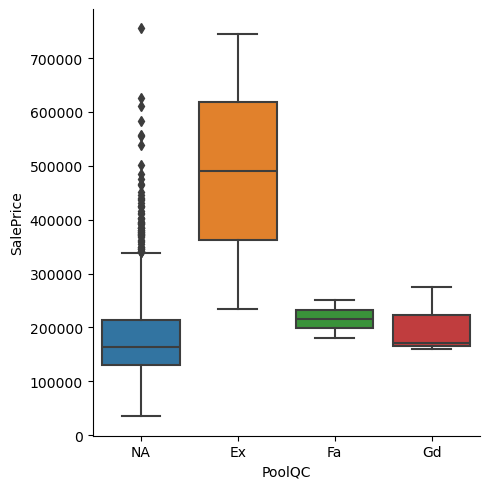

In [11]:
sns.catplot(data=train_df, x='PoolQC', y='SalePrice', kind='box')

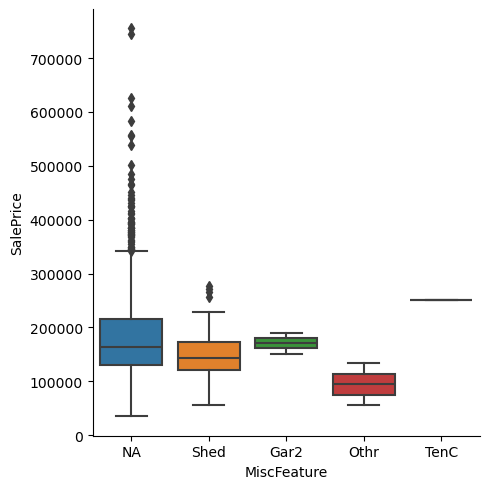

In [12]:
sns.catplot(data=train_df, x="MiscFeature", y="SalePrice", kind="box")

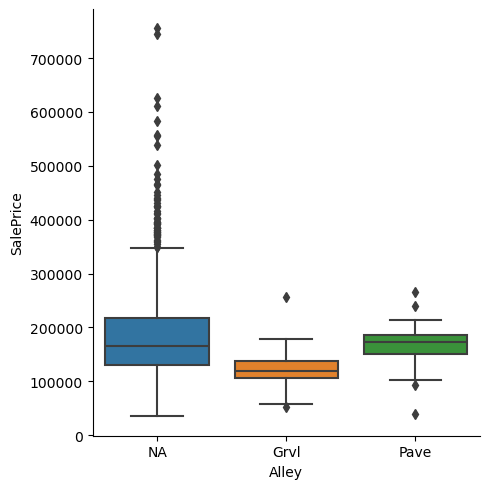

In [13]:
sns.catplot(data= train_df, x="Alley", y="SalePrice", kind="box")

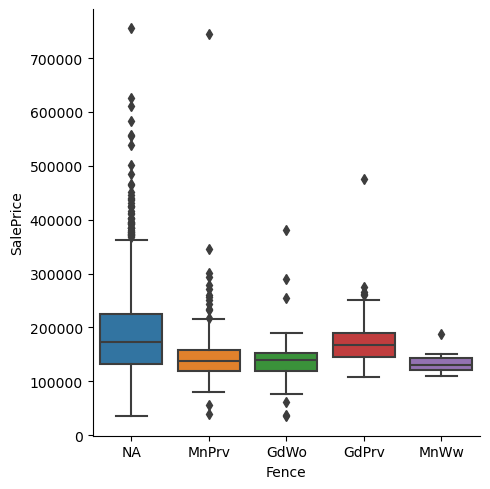

In [14]:
sns.catplot(data=train_df, x="Fence", y="SalePrice", kind="box")

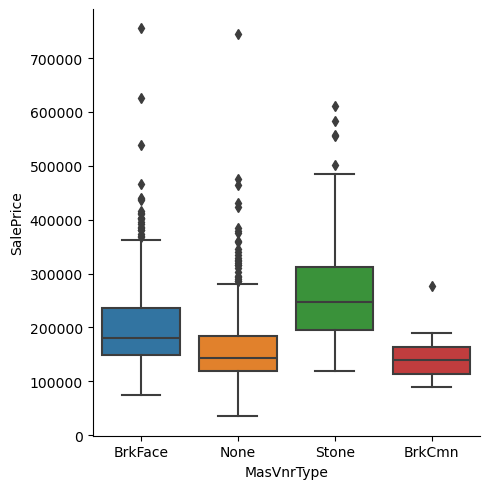

In [15]:
sns.catplot(data=train_df, x="MasVnrType", y="SalePrice", kind="box")

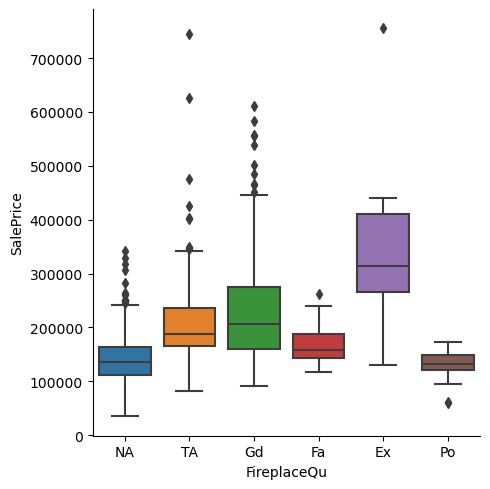

In [16]:
sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

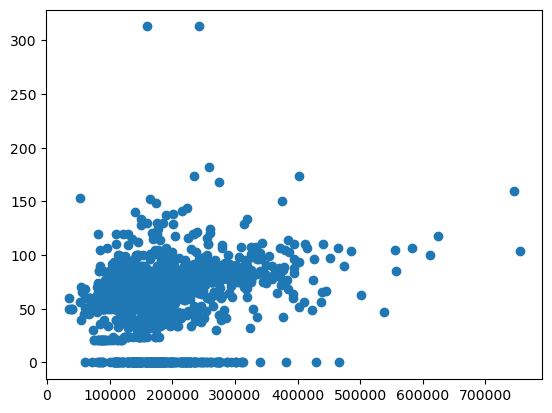

In [17]:
plt.scatter(x=train_df["SalePrice"], y=train_df["LotFrontage"])

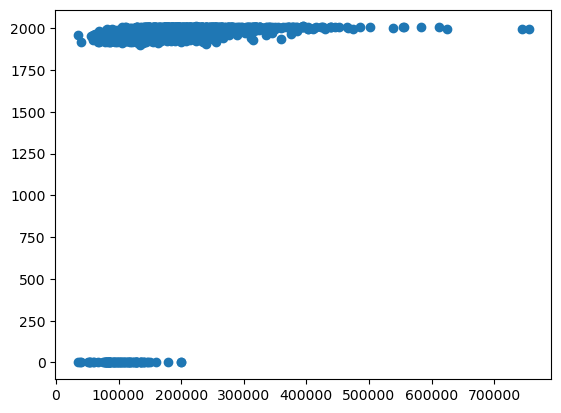

In [18]:
plt.scatter(x=train_df["SalePrice"], y=train_df["GarageYrBlt"])

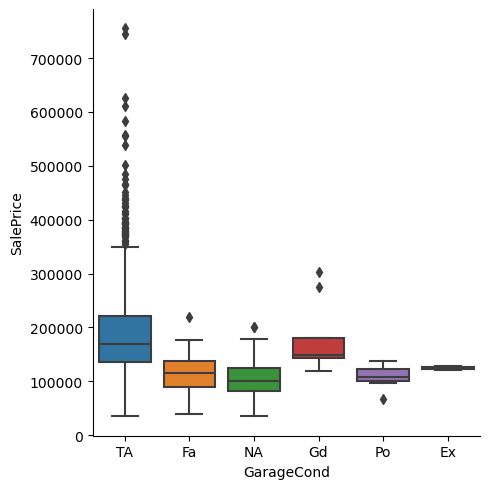

In [19]:
sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

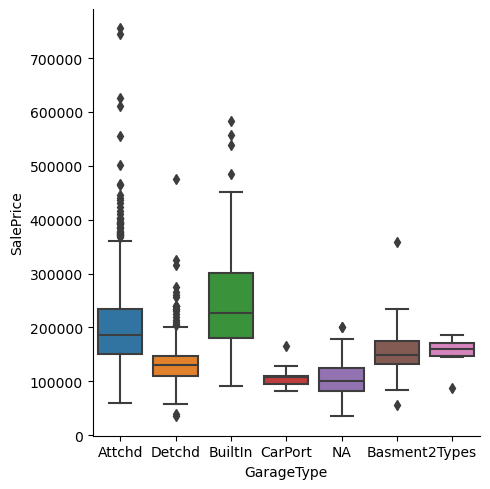

In [20]:
sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

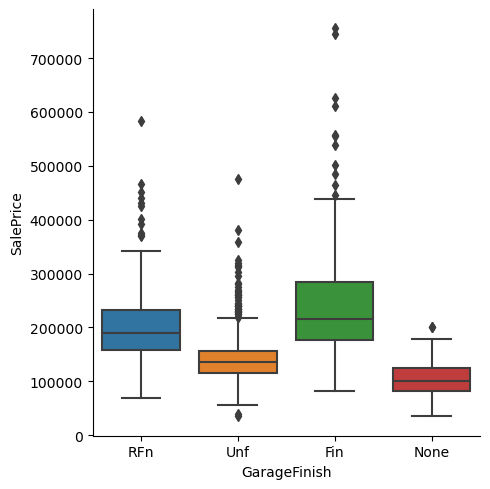

In [21]:
sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

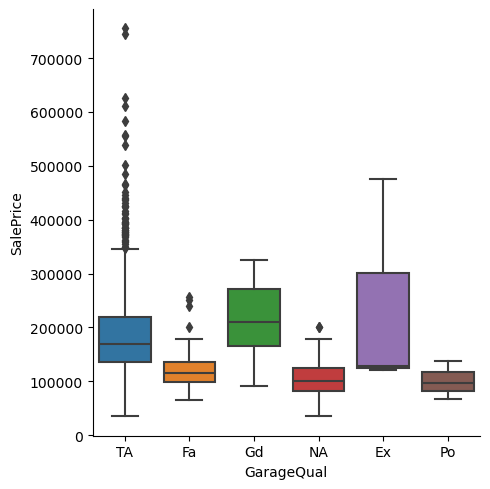

In [22]:
sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

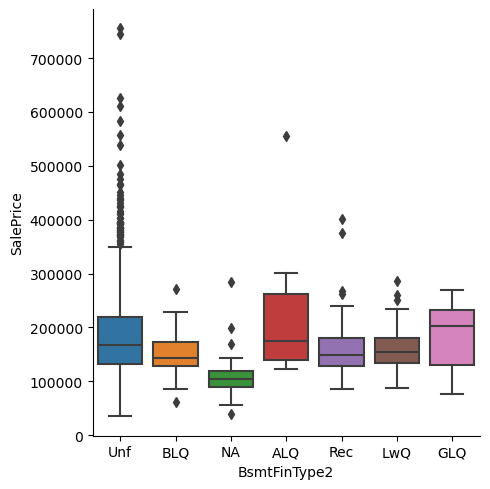

In [23]:
sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

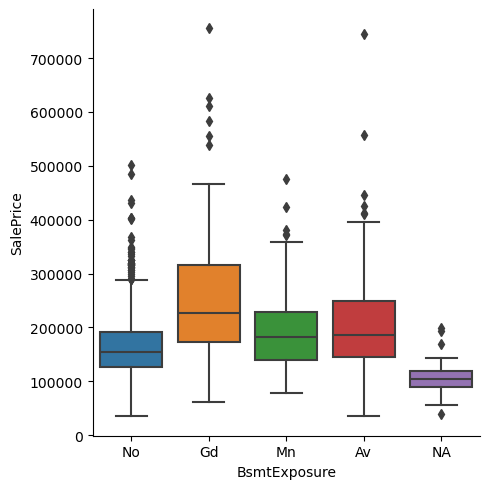

In [24]:
sns.catplot(data=train_df, x="BsmtExposure", y="SalePrice", kind="box")

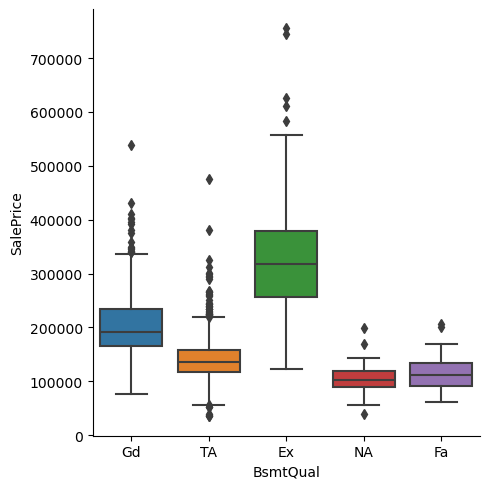

In [25]:
sns.catplot(data=train_df, x="BsmtQual", y="SalePrice", kind="box")

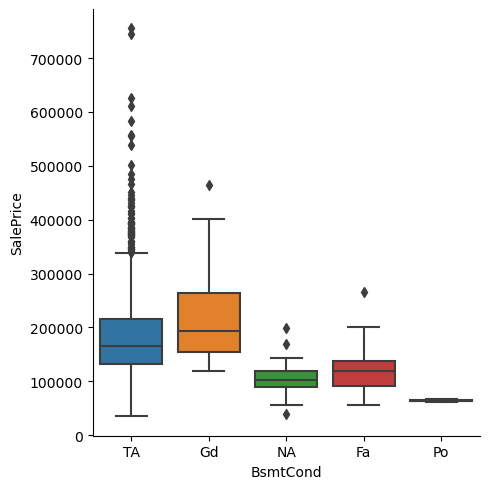

In [26]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

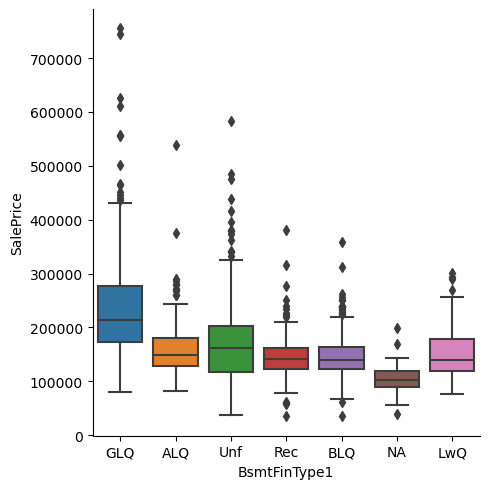

In [27]:
sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")

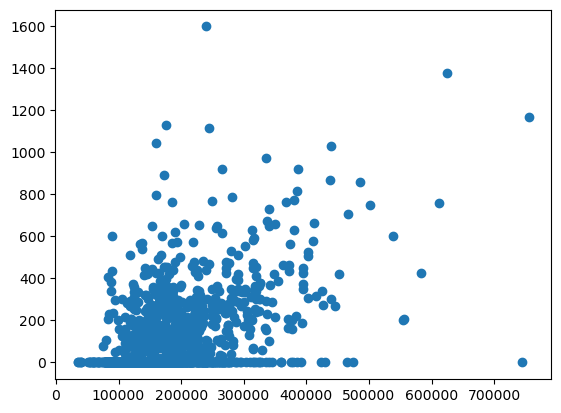

In [28]:
plt.scatter(x=train_df["SalePrice"], y=train_df["MasVnrArea"])

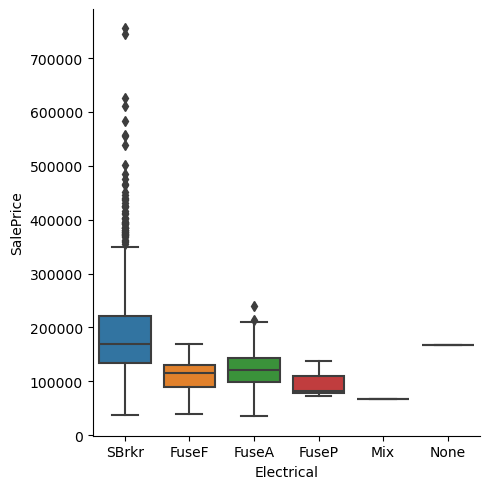

In [29]:
sns.catplot(data=train_df, x="Electrical", y="SalePrice", kind="box")

### Drop columns that have little relation to Sale Price

In [30]:
train_df = train_df.drop(columns=["MiscFeature", "Alley", "Fence", "GarageYrBlt"])
test_df = test_df.drop(columns=["MiscFeature", "Alley", "Fence", "GarageYrBlt"])

train_num = train_df.select_dtypes(include = ['float64', 'int64'])

# Feature Engineering

In [31]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [32]:
train_df["HouseAge"] = train_df["YrSold"] - train_df["YearBuilt"]
train_df["HouseModelAge"] = train_df["YrSold"] - train_df["YearRemodAdd"]
train_df["TotalSF"] = train_df["BsmtFinSF1"] + train_df["BsmtFinSF2"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
train_df["TotalArea"] = train_df["TotalBsmtSF"] + train_df["GrLivArea"]
train_df["TotalBath"] = train_df["FullBath"] + 0.5*train_df["HalfBath"] + train_df["BsmtFullBath"] + 0.5*train_df["BsmtHalfBath"]
train_df["TotalPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + train_df["3SsnPorch"] + train_df["ScreenPorch"]

test_df["HouseAge"] = test_df["YrSold"] - test_df["YearBuilt"]
test_df["HouseModelAge"] = test_df["YrSold"] - test_df["YearRemodAdd"]
test_df["TotalSF"] = test_df["BsmtFinSF1"] + test_df["BsmtFinSF2"] + test_df["1stFlrSF"] + test_df["2ndFlrSF"]
test_df["TotalArea"] = test_df["TotalBsmtSF"] + test_df["GrLivArea"]
test_df["TotalBath"] = test_df["FullBath"] + 0.5*test_df["HalfBath"] + test_df["BsmtFullBath"] + 0.5*test_df["BsmtHalfBath"]
test_df["TotalPorchSF"] = test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + test_df["3SsnPorch"] + test_df["ScreenPorch"]

In [33]:
train_df = train_df.drop(columns=["YrSold", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "BsmtFinSF2", "1stFlrSF", "2ndFlrSF", "TotalBsmtSF", "GrLivArea", "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"])
test_df = test_df.drop(columns=["YrSold", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "BsmtFinSF2", "1stFlrSF", "2ndFlrSF", "TotalBsmtSF", "GrLivArea", "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"])

In [34]:
#Save datasets
train_df.to_csv("../Data/Data/Initial Filtering/train_filter.csv")
test_df.to_csv("../Data/Data/Initial Filtering/test_filter.csv")